In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json as js
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import csv

In [2]:
# Reading Json file into df1
df1 = pd.read_json('Part1 - Car-Attributes.json')
print(df1)

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]


In [3]:
# Reading intial csv file into df2
df2 = pd.read_csv('Part1 - Car name.csv')
print(df2)

                      car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]


In [4]:
# Using Concat function we merged both the data frames on the basis of columns
new_df = pd.concat([df1, df2], axis='columns')
print(new_df)

      mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]


In [5]:
# Create and save the result of the merge as a seperate csv file for future use 
# And newdf is the data frame which we are going work on
newdf = new_df.to_csv('newmpg.csv', index=False)

In [6]:
#Importing new csv file into our notebook.

newdf = pd.read_csv('newmpg.csv')
newdf.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [7]:
newdf.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [39]:
np.mean(newdf.mpg)

23.51457286432161

In [8]:
newdf.shape

(398, 9)

In [9]:
# Check for null 
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
newdf.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

<AxesSubplot:>

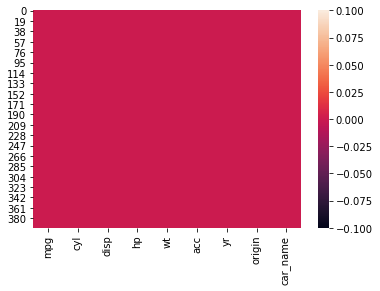

In [11]:
sns.heatmap(newdf.isnull())

## car_name and horsepower(hp) attributes are object type.

### Horsepower doesnt have any missing values but have some special chars i:e '?'


In [12]:
print(newdf['hp'].values[0:40])

['130' '165' '150' '150' '140' '198' '220' '215' '225' '190' '170' '160'
 '150' '225' '95' '95' '97' '85' '88' '46' '87' '90' '95' '113' '90' '215'
 '200' '210' '193' '88' '90' '95' '?' '100' '105' '100' '88' '100' '165'
 '175']


In [13]:
# As we can clearly see some "?" values in the 'hp' attribute. Filtering only those rows where 'hp' == '?'

newdf[newdf['hp'] == '?']

#Imputation process for hp

df_with = newdf[newdf['hp'] == '?']
df_without = newdf[newdf['hp'] != '?']

# Converting df_without to float

df_without.hp = df_without.hp.astype(float)

# Replacing '?' with mean value of horsepower attribute

df_without_mean = df_without.hp.mean()
df_with['hp'] = df_without_mean

In [14]:
# Now concating with and without '?' dataframes

with_wo = [df_without, df_with]
newdf = pd.concat(with_wo)

In [15]:
newdf.shape

(398, 9)

In [16]:
newdf.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [17]:
# Verifying

newdf[newdf['hp'] == '?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name


## Visualization

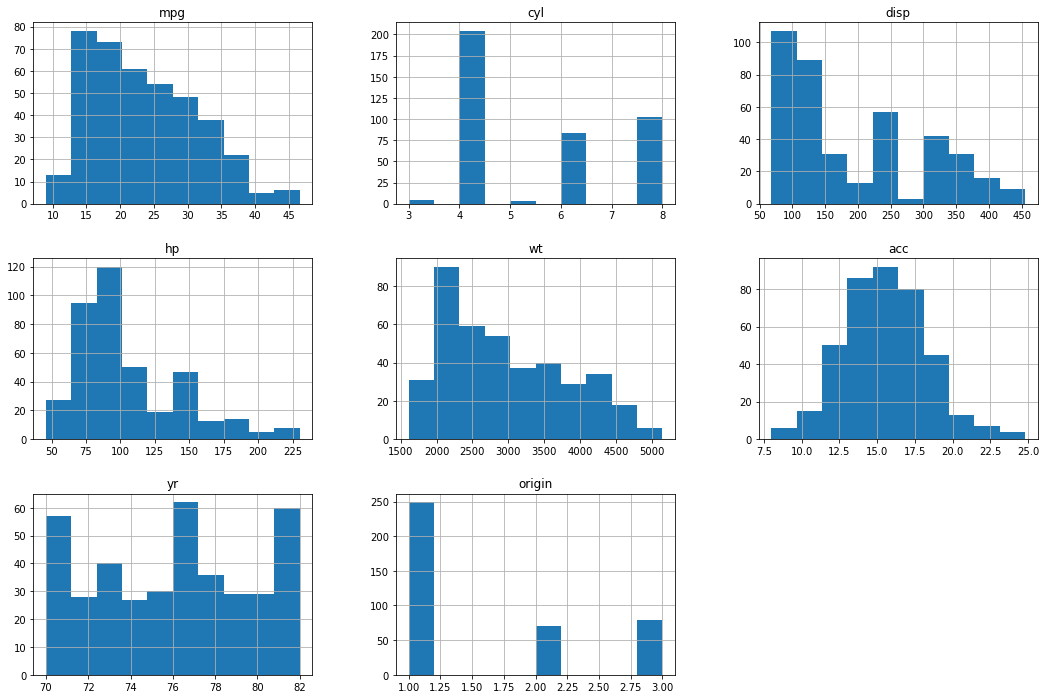

In [18]:
# HIstogram

newdf.hist(grid =True, figsize=(18,12))
plt.show()

### Some are normally distributed while some are exponentially distributed

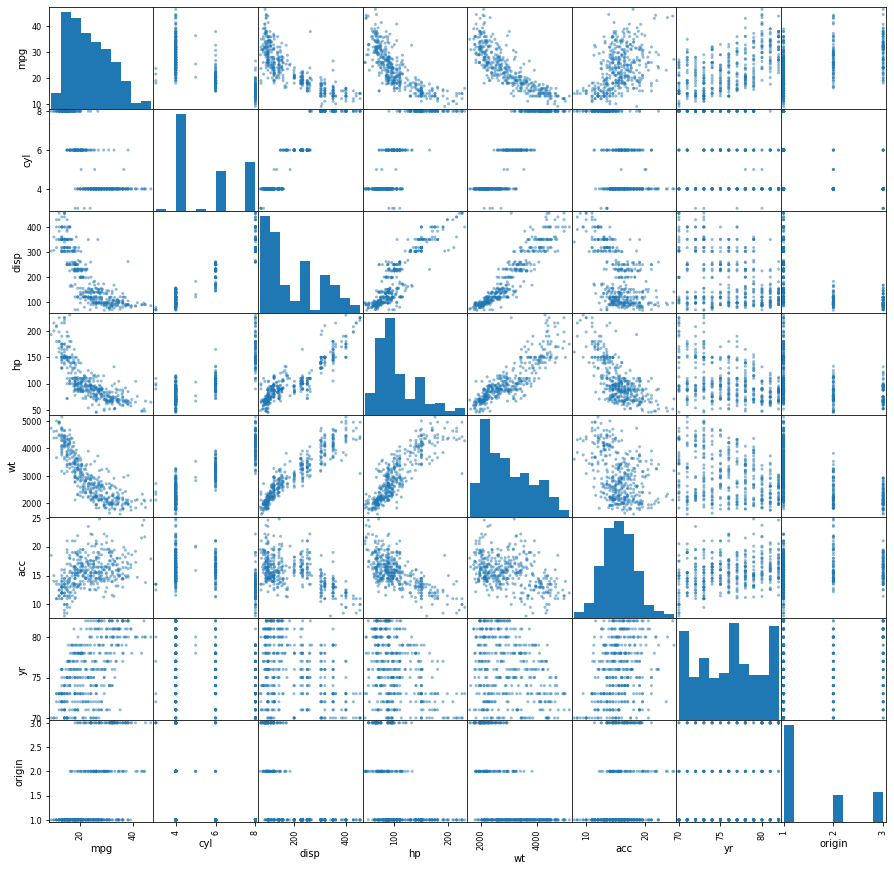

In [19]:
# Scatter Matrix

scat_matrix = pd.plotting.scatter_matrix(newdf, figsize=(15,15))
plt.show()

#### Relation between MPG and other attributes.
    -> As the horsepower decreases, mpg increases or the other way
    -> As the weight decreases, mpg increases 
    -> As the displacement decreases, mpg increases or the other way
    -> Cylinders and Origin year doesn't impact "mpg" that much
    -> Year increases, mpg increases but at the bottom level

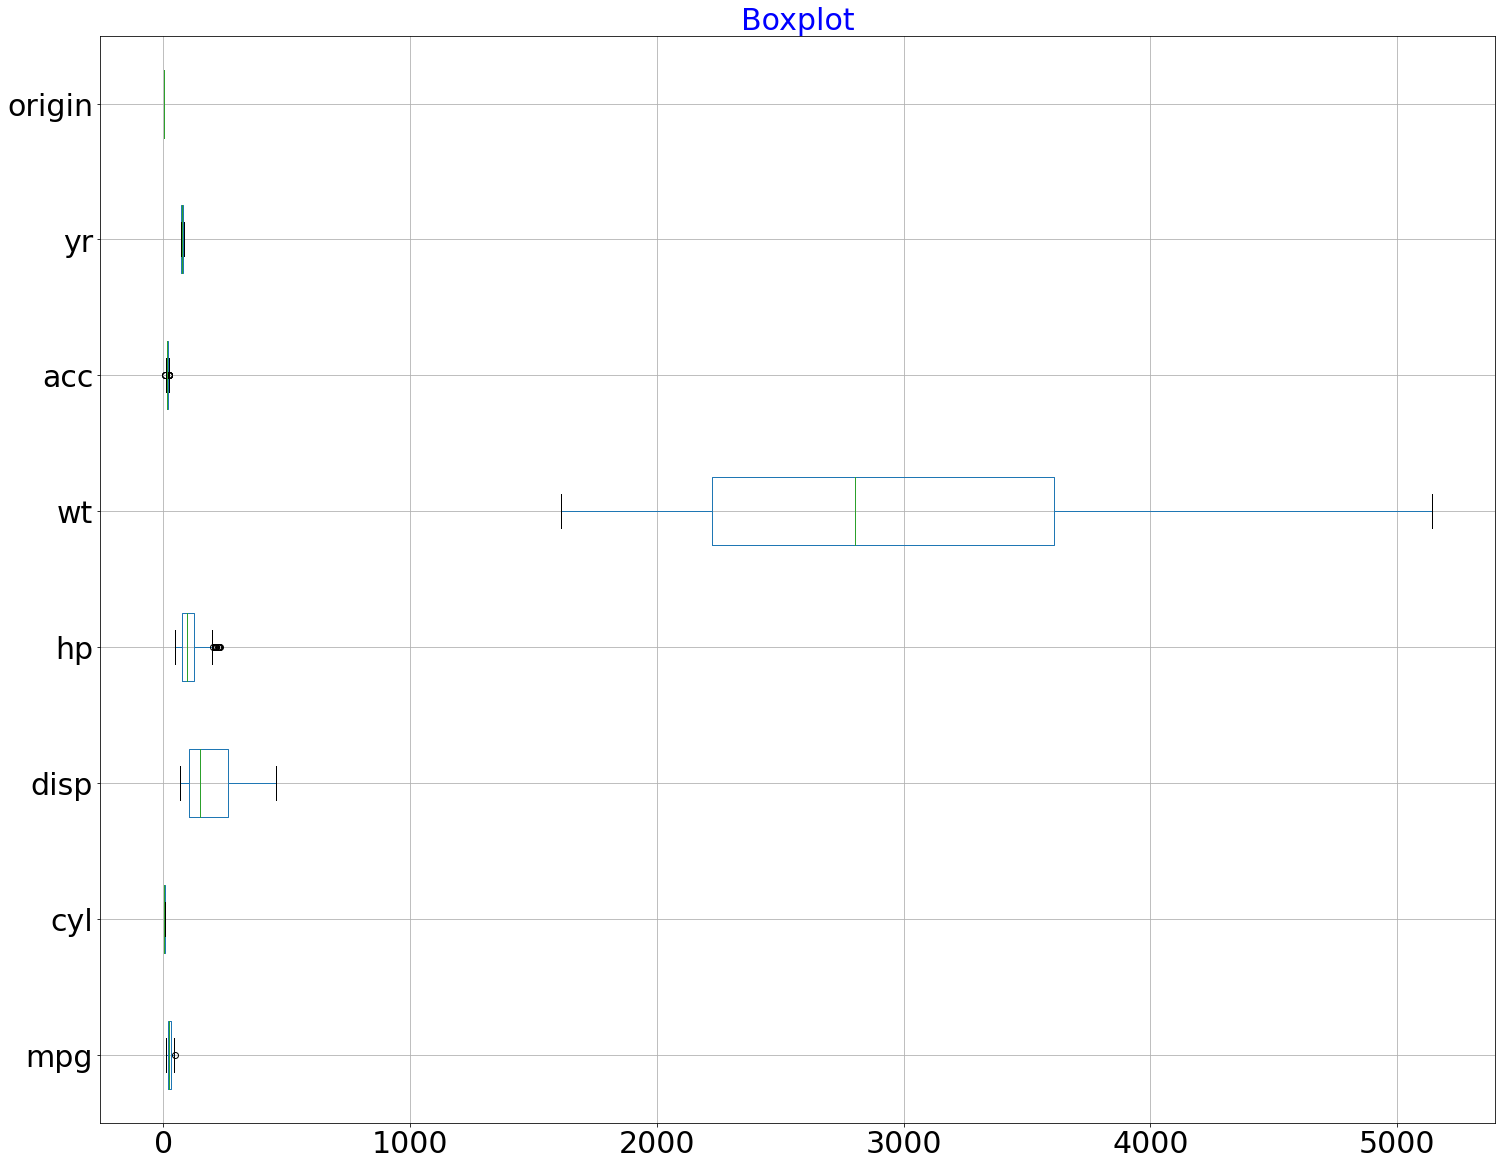

In [20]:
# Box plot

box_plt = newdf.boxplot(column=['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr',
                              'origin'], figsize=(25,20), fontsize=30, vert=False)
plt.title("Boxplot", size=30, color='b')
plt.show()

#### Attributes like origin,cylinders and year are not distributed.

#### Weight variable is enormously distributed compared to other attributes in the dataframe


### If we take a closer look, there are lot of cars based on the same company but of different models
        By splitting the company from the model, we can know how many cars does each company produce irrespective of the model
       

In [21]:
newdf['car_name'].value_counts()

ford pinto              6
amc matador             5
ford maverick           5
toyota corolla          5
peugeot 504             4
                       ..
vw rabbit custom        1
dodge dart custom       1
mazda glc custom l      1
ford fiesta             1
datsun 510 hatchback    1
Name: car_name, Length: 305, dtype: int64

In [22]:
model=[]
for i in newdf['car_name']:
    i=i.split()
    model.append(i[0])
    
# Adding the new model to our dataframe

newdf['company'] = model


In [23]:
newdf['company'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
mercedes-benz     2
maxda             2
cadillac          2
vokswagen         1
capri             1
triumph           1
toyouta           1
nissan            1
mercedes          1
chevroelt         1
hi                1
Name: company, dtype: int64

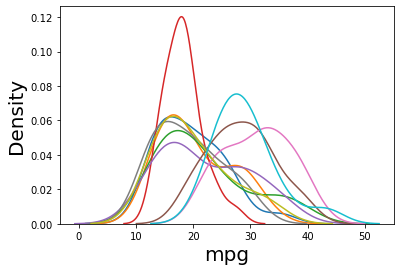

In [24]:
brnd = newdf.dropna(subset=['mpg'])
brnd = newdf['company'].value_counts()[:10]
brnd = list(brnd.index)

for k in brnd:
    subset = newdf[newdf['company'] == k]
    sns.kdeplot(subset['mpg'].dropna(),
    label = k, alpha=0.8)

# density plot of mpg
plt.xlabel('mpg',size=20)
plt.ylabel('Density',size=20)
plt.show()

In [25]:
newdf.skew()

mpg       0.457066
cyl       0.526922
disp      0.719645
hp        1.095552
wt        0.531063
acc       0.278777
yr        0.011535
origin    0.923776
dtype: float64

<AxesSubplot:xlabel='disp', ylabel='Density'>

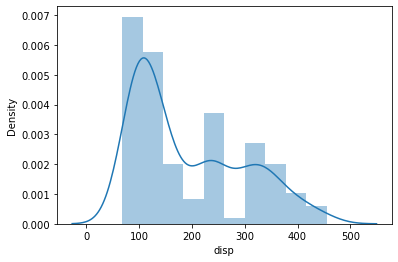

In [26]:
sns.distplot(newdf['disp'])

<AxesSubplot:xlabel='hp', ylabel='Density'>

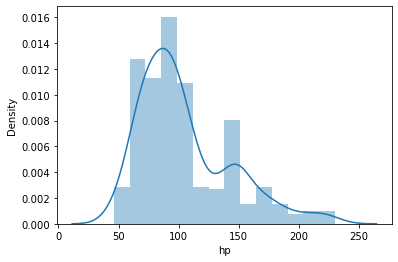

In [27]:
sns.distplot(newdf['hp'])

<AxesSubplot:xlabel='origin', ylabel='Density'>

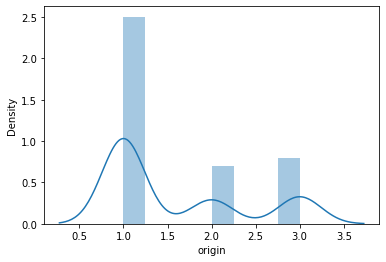

In [28]:
sns.distplot(newdf['origin'])

As we can see the above distributions are not normally distributed, so we are using box-cox transformation.

<AxesSubplot:xlabel='hp', ylabel='Density'>

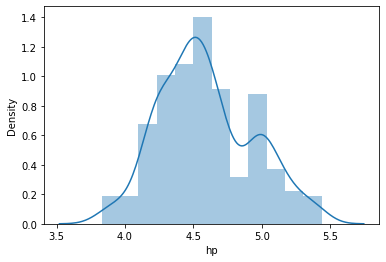

In [29]:
from scipy.stats import boxcox
newdf['disp']=boxcox(newdf['disp'],0)
newdf['hp']=boxcox(newdf['hp'],0)
newdf['origin']=boxcox(newdf['origin'],0)

sns.distplot(newdf['hp'])

    We can see that the non-normal distribution was converted into a normal distribution or rather close to normal using the SciPy.stats.boxcox()

In [30]:
newdf.skew()

mpg       0.457066
cyl       0.526922
disp      0.226003
hp        0.364639
wt        0.531063
acc       0.278777
yr        0.011535
origin    0.736292
dtype: float64

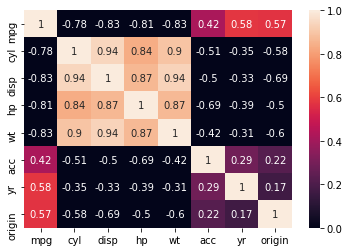

In [31]:
sns.heatmap(newdf.corr(), vmax =1,vmin=0,annot=True)
plt.show()

In [32]:
# Splitting the data into training and testing sets
X = newdf.drop(['mpg', 'car_name','company'], axis = 1)
y = newdf[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
newdf.shape

(298, 7)
(100, 7)
(298, 1)
(100, 1)


(398, 10)

## K-Means Clustering

Text(0, 0.5, 'WCSS')

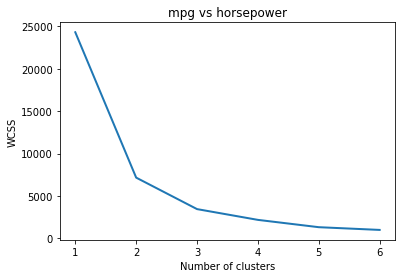

In [33]:
# To find optimal number of clusters, we are going with Elbow Method.
from sklearn.cluster import KMeans
k_cluster = X.copy(deep=True)#(deep=True) creates a new object with a copy of the calling object’s data

wcss=[]
for p in range(1,7):
    kmeans = KMeans(n_clusters = p, init='k-means++', random_state=0)
    kmeans.fit(newdf[['mpg','hp']])
    
    wcss.append(kmeans.inertia_)
    

sns.lineplot(x=range(1,7), y=wcss,lw= 2)
plt.title('mpg vs horsepower')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### The elbow method shows that majority of the bend happens at 2
  Therefore, no of clusters = 2

## Hierarchial Clustering

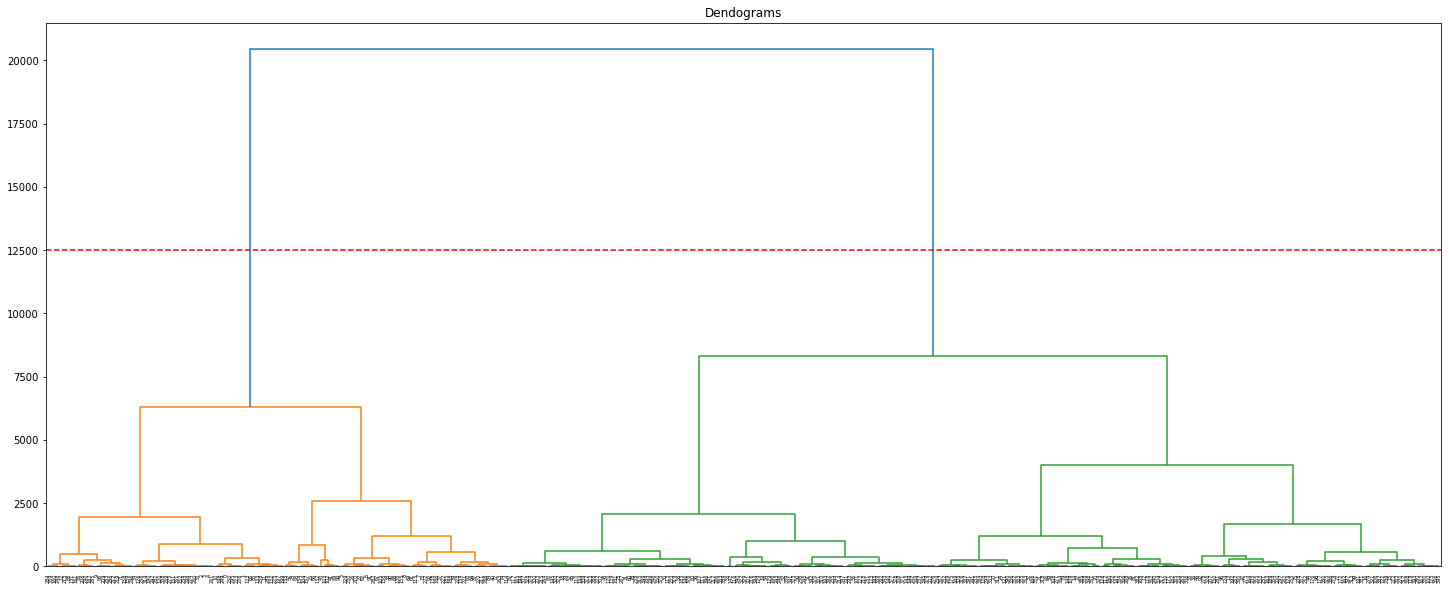

In [34]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25,10))
plt.title("Dendograms")
dendogram = shc.dendrogram(shc.linkage(X,method='ward'))
plt.axhline(y=12500,color='r',linestyle='--')

#### A vertical line is then drawn through the Dendogram. As the horizontal line crosses the blue line at two points, the number of clusters would be two.

### Insights.
    1. I would say hierarchial clustering can be more time taking when handling big data 
    2. Hierarchial Clustering is not very legible at the bottom due to the size of the data.
    3. K Means requires the number of clusters to work on, but in hierarchial clustering we can choose whatever number of clusters interpreting the Dendogram.

<AxesSubplot:xlabel='mpg', ylabel='hp'>

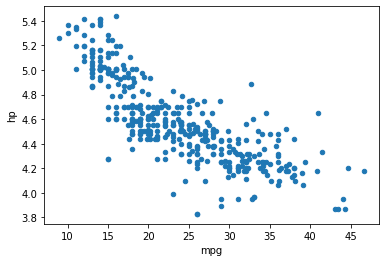

In [35]:
newdf.plot.scatter('mpg','hp')

### Linear regression on hierarchial clusters